# Introduction to NLP using Python

The notebook has **two sections**.

### Section 1
The first section focuses on basic preprocessing in NLP such as tokenization, stopwords, stemming, and lemmatization. 

**Objective**: This section aims to get participants 'feel' what's the first step of processing text data for modeling. Participants are encouraged to edit and re-run the code to see the different results by themselves.

### Section 2
The second section shows us how to build machine learning model for one NLP task which is **text classification**.

**Objective**: This section aims to show participants typical workflow in approaching text classification problem.

**Problem**: Classifying 20 different news group

**Dataset**: [20 Newsgroup](http://qwone.com/~jason/20Newsgroups/). We will use sklearn.dataset to load this dataset

## Section 1

In [2]:
# First we need to download NLTK data
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

**Tokenization**

There are two level of tokenization i.e. sentence tokenization and word tokenization. Sentence tokenization is used to split text (>1 sentence) into sentence tokens. While work tokenization is used to split sentence (>1 word) into word tokens.

In [4]:
# Sentence tokenization
from nltk.tokenize import sent_tokenize

text = """ tokenization is the process of converting a sequence of characters into a sequence of tokens. 
A program that performs lexical analysis may be termed a lexer, tokenizer.
"""

tokenized_sentence = sent_tokenize(text)
print(tokenized_sentence)

[' tokenization is the process of converting a sequence of characters into a sequence of tokens.', 'A program that performs lexical analysis may be termed a lexer, tokenizer.']


In [5]:
# Word tokenization
from nltk.tokenize import word_tokenize

text = """ tokenization is the process of converting a sequence of characters into a sequence of tokens. 
A program that performs lexical analysis may be termed a lexer, tokenizer.
"""

tokenized_words = word_tokenize(text)
print(tokenized_words)

['tokenization', 'is', 'the', 'process', 'of', 'converting', 'a', 'sequence', 'of', 'characters', 'into', 'a', 'sequence', 'of', 'tokens', '.', 'A', 'program', 'that', 'performs', 'lexical', 'analysis', 'may', 'be', 'termed', 'a', 'lexer', ',', 'tokenizer', '.']


In [6]:
# Word frequency
# This is one of the way to understand better the text.

from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)
print(fdist)
fdist

<FreqDist with 24 samples and 30 outcomes>


FreqDist({'of': 3, 'a': 3, 'sequence': 2, '.': 2, 'tokenization': 1, 'is': 1, 'the': 1, 'process': 1, 'converting': 1, 'characters': 1, ...})

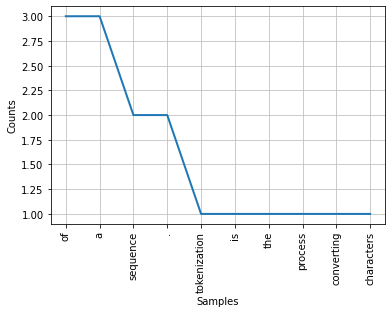

In [7]:
# Plot the distribtion using bar chart
# Select top 10 frequent words, you may change it
import matplotlib.pyplot as plt
fdist.plot(10, cumulative=False)
plt.show()

**Stopwords**

Implementation of stopwords may vary for several libraries such as NLTK and Spacy. The stopwords also different for each language. In this section we will only focus on English stopwords in NLTK.

In [8]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'do', 'weren', 'as', 'of', 's', 'hers', 'over', 'such', 'yourself', 'during', 'when', 'are', "won't", "doesn't", "you'll", 'than', 'herself', 'whom', 'have', 'its', "shan't", 'just', "wouldn't", 'by', 'on', 'they', 'were', 'more', 'down', 'our', 'who', 'at', 'with', 'nor', 'that', "should've", 'then', 'wasn', 'mustn', 'about', 'an', 'i', 'd', 'if', 'being', 'she', 'so', 'through', 'between', 'wouldn', 'y', 'themselves', 'is', 'how', 'ma', "weren't", 'has', 'did', 'below', 'into', 'not', 'his', 'me', 'the', 'same', 'm', 'for', 'won', 're', 'their', 'does', 'haven', 'both', "mustn't", 'no', "needn't", 'couldn', 'himself', 'was', 'in', 'ours', 'only', 'yours', 'all', 'until', 'above', 'this', 'up', 'a', 'aren', 'myself', 'should', 'doesn', "hasn't", 'after', 'those', 'from', 'them', 'because', 'can', "couldn't", 'now', 'other', 'o', 'where', 'll', 'shan', 'hasn', 'any', "isn't", 'it', "that'll", 'here', 'been', 'your', 'him', "haven't", "don't", 'but', "mightn't", 'while', "shouldn't", '

In [9]:
# Removing stopwords from text
filtered_words = []
for w in tokenized_words:
    if w not in stop_words:
        filtered_words.append(w)
print("Tokenized Words:",tokenized_words)
print("\n")
print("Filterd Words:",filtered_words)

Tokenized Words: ['tokenization', 'is', 'the', 'process', 'of', 'converting', 'a', 'sequence', 'of', 'characters', 'into', 'a', 'sequence', 'of', 'tokens', '.', 'A', 'program', 'that', 'performs', 'lexical', 'analysis', 'may', 'be', 'termed', 'a', 'lexer', ',', 'tokenizer', '.']


Filterd Words: ['tokenization', 'process', 'converting', 'sequence', 'characters', 'sequence', 'tokens', '.', 'A', 'program', 'performs', 'lexical', 'analysis', 'may', 'termed', 'lexer', ',', 'tokenizer', '.']


**Stemming and Lemmatization**

Stemming & Lemmatization are one of the way for normalizing the words into standard words. Stemming focus on removing *sufix* e.g. -es, -s, -ing, -ed. Lemmatization focus on converting irregular words to its base words e.g. bought -> buy.

In [10]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()
stemmed_words = []
for w in filtered_words:
    stemmed_words.append(stemmer.stem(w))
    
print("Filtered Words:",filtered_words)
print("\n")
print("Stemmed Words",stemmed_words)

Filtered Words: ['tokenization', 'process', 'converting', 'sequence', 'characters', 'sequence', 'tokens', '.', 'A', 'program', 'performs', 'lexical', 'analysis', 'may', 'termed', 'lexer', ',', 'tokenizer', '.']


Stemmed Words ['token', 'process', 'convert', 'sequenc', 'charact', 'sequenc', 'token', '.', 'A', 'program', 'perform', 'lexic', 'analysi', 'may', 'term', 'lexer', ',', 'token', '.']


In [18]:
# Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

words = ['running', 'bought', 'buying', 'flying', 'discounted']
for w in words:
    print("Word:",w)
    print("Lemmatized Word:", lemmatizer.lemmatize(w, 'v'))
    print("Stemmed Word:", stemmer.stem(w))
    print("\n")

Word: running
Lemmatized Word: run
Stemmed Word: run


Word: bought
Lemmatized Word: buy
Stemmed Word: bought


Word: buying
Lemmatized Word: buy
Stemmed Word: buy


Word: flying
Lemmatized Word: fly
Stemmed Word: fli


Word: discounted
Lemmatized Word: discount
Stemmed Word: discount




**Part of Speech Tagging**

The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context.

In [20]:
import nltk
from nltk.tokenize import word_tokenize

sentence = "Albert Einstein was born in Ulm, Germany in 1879."

tokens = word_tokenize(sentence)
print("Tokens:", tokens)
print("PoS Tag:", nltk.pos_tag(tokens))

Tokens: ['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']
PoS Tag: [('Albert', 'NNP'), ('Einstein', 'NNP'), ('was', 'VBD'), ('born', 'VBN'), ('in', 'IN'), ('Ulm', 'NNP'), (',', ','), ('Germany', 'NNP'), ('in', 'IN'), ('1879', 'CD'), ('.', '.')]


## Section 2

In this section we will use vectorizers from scikit-learn to perform text preprocessing and creating feature representation.

`We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation.` [reference](https://scikit-learn.org/stable/modules/feature_extraction.html)

---
**Problem**: Classifying 20 different news group

**Type**: Multi-class classification problem (with imbalanced target distribution (?))

**Dataset**: [20 Newsgroup](http://qwone.com/~jason/20Newsgroups/)

**Performance Metrics**: Macro F1-score. (why macro F1-score? we want to capture the model performance in each of the classes)

**Feature Representation**: Bag of Words with *count* and *TF-IDF* value

**Learning Algorithm**: Logistic Regression

In [120]:
# Library
from sklearn.datasets import fetch_20newsgroups
import numpy as np

## for EDA
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

## for Modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

### Load Data + EDA

In [59]:
# load dataset
# The 20 Newsgroup datasets already have splitting for training and test dataset
# The split between the train and test set is based upon a messages posted before and after a specific date.
# It has 18846 newsgroups posts, 11314 for training set and the rest for test set.

newsgroup_train = fetch_20newsgroups(subset='train')
newsgroup_test = fetch_20newsgroups(subset='test')

newsgroup_train.target.shape, newsgroup_test.target.shape

((11314,), (7532,))

In [46]:
# See type of class/newsgroups
newsgroup_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [56]:
# See the distribution of newsgroups
unique, counts = np.unique(newsgroup_train.target, return_counts=True)
# print(np.asarray((unique, counts)).T)
print(np.asarray((newsgroup_train.target_names, counts)).T)

# The dataset has imbalance class distribution, class rec.sport tend to have higher samples than class talk.religion.misc

[['alt.atheism' '480']
 ['comp.graphics' '584']
 ['comp.os.ms-windows.misc' '591']
 ['comp.sys.ibm.pc.hardware' '590']
 ['comp.sys.mac.hardware' '578']
 ['comp.windows.x' '593']
 ['misc.forsale' '585']
 ['rec.autos' '594']
 ['rec.motorcycles' '598']
 ['rec.sport.baseball' '597']
 ['rec.sport.hockey' '600']
 ['sci.crypt' '595']
 ['sci.electronics' '591']
 ['sci.med' '594']
 ['sci.space' '593']
 ['soc.religion.christian' '599']
 ['talk.politics.guns' '546']
 ['talk.politics.mideast' '564']
 ['talk.politics.misc' '465']
 ['talk.religion.misc' '377']]


In [79]:
# Sample 1 text in training data
print(newsgroup_train.data[2])
print(newsgroup_train.target_names[2])

From: twillis@ec.ecn.purdue.edu (Thomas E Willis)
Subject: PB questions...
Organization: Purdue University Engineering Computer Network
Distribution: usa
Lines: 36

well folks, my mac plus finally gave up the ghost this weekend after
starting life as a 512k way back in 1985.  sooo, i'm in the market for a
new machine a bit sooner than i intended to be...

i'm looking into picking up a powerbook 160 or maybe 180 and have a bunch
of questions that (hopefully) somebody can answer:

* does anybody know any dirt on when the next round of powerbook
introductions are expected?  i'd heard the 185c was supposed to make an
appearence "this summer" but haven't heard anymore on it - and since i
don't have access to macleak, i was wondering if anybody out there had
more info...

* has anybody heard rumors about price drops to the powerbook line like the
ones the duo's just went through recently?

* what's the impression of the display on the 180?  i could probably swing
a 180 if i got the 80Mb disk

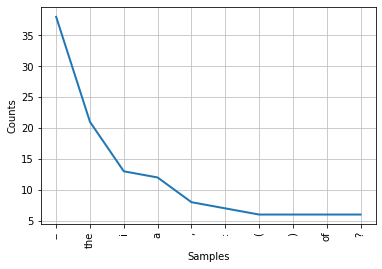

In [82]:
# Most frequent words in training
# See 1 sample sentence in training data
training_tokenized_words = word_tokenize(newsgroup_train.data[2])
fdist = FreqDist(training_tokenized_words)
# Plot Top 10 frequent words in training
import matplotlib.pyplot as plt
fdist.plot(10, cumulative=False)
plt.show()

# Sampled text have a lot of symbols,
# Lets try build the CountVectorizer and see what's word the most frequent

### Preprocessing

In [85]:
# First we will use CountVectorizer for transforming text to numeric representations
# The representations will be the occurrences of the word in training data

vectorizer = CountVectorizer(lowercase=True, # convert the words to lowercase before tokenizing the text
                             stop_words='english', # stopwords, could be a list of words
                             ngram_range=(1,1), # n_gram range (n_min, n_max)
                             analyzer='word', #{‘word’, ‘char’} Whether the feature should be made of word n-gram or character n-grams
                             max_features=1500, # max number of features representations, sort by occurrence
                            )

vectorizer.fit(newsgroup_train.data)

CountVectorizer(max_features=1500, stop_words='english')

In [103]:
# Get the vocabulary of the embedding

# Top 6 words
print(sorted(vectorizer.vocabulary_.items(), reverse=True)[:6])

# Bottom 6 words
print(sorted(vectorizer.vocabulary_.items(), reverse=True)[-6:])
# the non frequent words consist of numbers

[('young', 1499), ('york', 1498), ('yes', 1497), ('years', 1496), ('year', 1495), ('yeah', 1494)]
[('04', 5), ('03', 4), ('02', 3), ('01', 2), ('000', 1), ('00', 0)]


In [104]:
# Transform training and text data to vector/embedding
train_vct = vectorizer.transform(newsgroup_train.data)
test_vct = vectorizer.transform(newsgroup_test.data)

# Now each text sample is represented by 1500 features
train_vct.shape, test_vct.shape

((11314, 1500), (7532, 1500))

In [108]:
# The text sample is stored in sparse matrix
# Because it has a lot of zero values
train_vct[0]

<1x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 37 stored elements in Compressed Sparse Row format>

### Modeling

In [121]:
# define model
model = LogisticRegression(solver='saga')

# fit the model with target and vector training
model.fit(train_vct, newsgroup_train.target)

LogisticRegression(solver='saga')

In [111]:
# Predict the training label + test label
y_pred_train = model.predict(train_vct)
y_pred = model.predict(test_vct)

### Evaluation

In [117]:
# Evaluate the performance in training and test set
train_metrics = f1_score(y_pred_train, newsgroup_train.target, average='macro')
test_metrics = f1_score(y_pred, newsgroup_test.target, average='macro')

print("Macro F1-score in training:", train_metrics)
print("Macro F1-score in test:", test_metrics)

Macro F1-score in training: 0.4554769928465531
Macro F1-score in test: 0.38949996645077084


In [122]:
# See more comprehensive classification report using useful sklearn function
print(classification_report(y_pred, newsgroup_test.target, target_names=newsgroup_test.target_names))

# In the test set we observe that several classes e.g. talk.religion.misc and sci.electronics have few samples even 0.
# The macro f1-score must be dragged down by the classes

                          precision    recall  f1-score   support

             alt.atheism       0.15      0.75      0.25        64
           comp.graphics       0.21      0.79      0.34       105
 comp.os.ms-windows.misc       0.43      0.75      0.55       229
comp.sys.ibm.pc.hardware       0.30      0.48      0.37       240
   comp.sys.mac.hardware       0.14      0.84      0.24        63
          comp.windows.x       0.73      0.36      0.48       806
            misc.forsale       0.21      0.92      0.34        89
               rec.autos       0.34      0.80      0.48       169
         rec.motorcycles       0.26      0.94      0.41       112
      rec.sport.baseball       0.41      0.20      0.27       806
        rec.sport.hockey       0.76      0.49      0.59       621
               sci.crypt       0.90      0.26      0.40      1386
         sci.electronics       0.00      1.00      0.01         1
                 sci.med       0.31      0.44      0.36       275
         

In [123]:
# How about change the representation using TF-IDF Vectorizer

# preprocessing text
vectorizer = TfidfVectorizer(lowercase=True, # convert the words to lowercase before tokenizing the text
                             stop_words='english', # stopwords, could be a list of words
                             ngram_range=(1,1), # n_gram range (n_min, n_max)
                             analyzer='word', #{‘word’, ‘char’} Whether the feature should be made of word n-gram or character n-grams
                             max_features=1500, # max number of features representations, sort by occurrence
                            )
vectorizer.fit(newsgroup_train.data)

# define model
model = LogisticRegression(solver='saga')

# fit the model with target and vector training
model.fit(train_vct, newsgroup_train.target)

# Predict the training label + test label
y_pred_train = model.predict(train_vct)
y_pred = model.predict(test_vct)

# Evaluate the performance in training and test set
train_metrics = f1_score(y_pred_train, newsgroup_train.target, average='macro')
test_metrics = f1_score(y_pred, newsgroup_test.target, average='macro')

print("Macro F1-score in training:", train_metrics)
print("Macro F1-score in test:", test_metrics)

# See more comprehensive classification report using useful sklearn function
print(classification_report(y_pred, newsgroup_test.target, target_names=newsgroup_test.target_names))

# It seems that TF-IDF representations is not improving the model

Macro F1-score in training: 0.45597672519091625
Macro F1-score in test: 0.3879690082963584
                          precision    recall  f1-score   support

             alt.atheism       0.15      0.75      0.25        63
           comp.graphics       0.20      0.80      0.32        98
 comp.os.ms-windows.misc       0.44      0.73      0.55       236
comp.sys.ibm.pc.hardware       0.29      0.48      0.36       238
   comp.sys.mac.hardware       0.14      0.83      0.24        65
          comp.windows.x       0.73      0.36      0.48       790
            misc.forsale       0.22      0.92      0.35        92
               rec.autos       0.34      0.80      0.48       167
         rec.motorcycles       0.26      0.94      0.41       111
      rec.sport.baseball       0.41      0.20      0.27       812
        rec.sport.hockey       0.76      0.49      0.59       620
               sci.crypt       0.90      0.26      0.40      1386
         sci.electronics       0.00      1.00     

### Let's try to improve the model by doing Error Analysis + Cleaning